### Basic Data Processing and Simple model example

In [123]:
from imp import reload
from os import sys
import os
import pandas as pd
import numpy as np
import keras
from keras import optimizers
from keras.models import Sequential
from keras.callbacks import History
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from numpy import argmax
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from seaborn import heatmap

np.random.seed(42)

# setting up pandas
pd.set_option('display.max_columns', 500)

### Data [Source](https://www.kaggle.com/joniarroba/noshowappointments) and Description

**Content**  
300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. https://www.kaggle.com/joniarroba/noshowappointments

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia  

**Data Dictionary**  
PatientId - Identification of a patient AppointmentID - Identification of each appointment Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. DataMarcacaoConsulta = The day of the actuall appointment, when they have to visit the doctor. DataAgendamento = The day someone called or registered the appointment, this is before appointment of course. Age = How old is the patient. Neighbourhood = Where the appointment takes place. Scholarship = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia Hipertension = True or False Diabetes = True or False Alcoholism = True or False Handcap = True or False SMS_received = 1 or more messages sent to the patient. No-show = True or False.  

#### Step 1. Preview your data

In [124]:
data_read = pd.read_csv(os.getcwd()+"/doctors_noshows.csv")

In [125]:
data = data_read.copy()

In [126]:
data.shape

(110527, 14)

In [127]:
data[:15]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [128]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [129]:
data.SMS_received.unique()

array([0, 1], dtype=int64)

In [130]:
data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [131]:
data.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

#### Step 2. Processing data

In [132]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [133]:
# creating delta dates
data['days_delta'] = (pd.to_datetime(data.AppointmentDay).dt.date - pd.to_datetime(data.ScheduledDay).dt.date).dt.days

In [134]:
# augmenting data
data['week_day'] = pd.to_datetime(data.ScheduledDay).dt.weekday
data['month'] = pd.to_datetime(data.ScheduledDay).dt.month
data['day'] = pd.to_datetime(data.ScheduledDay).dt.day

In [135]:
# dropping unused columns
data.drop(labels=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [136]:
# previewing
data.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_delta,week_day,month,day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,4,29
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,4,29
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,4,29
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4,29
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,4,29


In [137]:
# converting no-show to numeric
def yn(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
    else:
        print("Error!")
        sys.exit()

In [138]:
# converting gender to numeric
def gnd(x):
    if x == 'F':
        return 0
    elif x == 'M':
        return 1
    else:
        print("Error!")
        sys.exit()

In [139]:
data["No-show"] = data["No-show"].apply(yn)
data["Gender"] = data["Gender"].apply(gnd)

##### Correlation test

In [140]:
test_cor_dat = data.copy()

In [141]:
test_cor_dat.drop(labels=['Neighbourhood','day'], axis=1, inplace=True)

In [142]:
test_cor_dat.head(5)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_delta,week_day,month
0,0,62,0,1,0,0,0,0,0,0,4,4
1,1,56,0,0,0,0,0,0,0,0,4,4
2,0,62,0,0,0,0,0,0,0,0,4,4
3,0,8,0,0,0,0,0,0,0,0,4,4
4,0,56,0,1,1,0,0,0,0,0,4,4


In [143]:
# rescaling numerical data
scaler = MinMaxScaler()
test_cor_dat['Age'] = scaler.fit_transform(np.array(test_cor_dat['Age']).reshape(-1,1))
test_cor_dat['week_day'] = scaler.fit_transform(np.array(test_cor_dat['week_day']).reshape(-1,1))
test_cor_dat['month'] = scaler.fit_transform(np.array(test_cor_dat['month']).reshape(-1,1))

C:\Users\vnesterov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [144]:
test_cor_dat.head(5)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_delta,week_day,month
0,0,0.543103,0,1,0,0,0,0,0,0,0.8,0.272727
1,1,0.491379,0,0,0,0,0,0,0,0,0.8,0.272727
2,0,0.543103,0,0,0,0,0,0,0,0,0.8,0.272727
3,0,0.077586,0,0,0,0,0,0,0,0,0.8,0.272727
4,0,0.491379,0,1,1,0,0,0,0,0,0.8,0.272727


In [145]:
new_data_cor_test = test_cor_dat.copy()

In [146]:
new_data_cor_test.head(5)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_delta,week_day,month
0,0,0.543103,0,1,0,0,0,0,0,0,0.8,0.272727
1,1,0.491379,0,0,0,0,0,0,0,0,0.8,0.272727
2,0,0.543103,0,0,0,0,0,0,0,0,0.8,0.272727
3,0,0.077586,0,0,0,0,0,0,0,0,0.8,0.272727
4,0,0.491379,0,1,1,0,0,0,0,0,0.8,0.272727


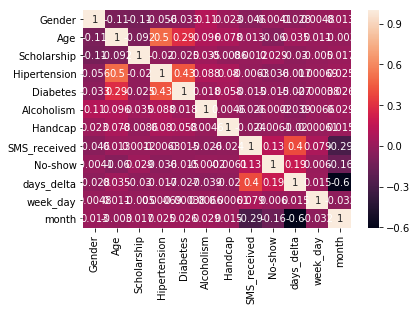

In [147]:
heatmap(new_data_cor_test.corr(), annot=True)

In [148]:
# getting most relevant columns
rel_cols = ['Gender', 'Age', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'days_delta', 'week_day', 'month', 'No-show', 'Neighbourhood']

##### processing relevant data

In [149]:
data = data[rel_cols].copy()

In [150]:
data.columns

Index(['Gender', 'Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'days_delta', 'week_day', 'month', 'No-show',
       'Neighbourhood'],
      dtype='object')

In [151]:
# defining categorical columns
catg_cols = ['Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received',
       'Neighbourhood']

In [152]:
# separating result column
no_show_data = data["No-show"]
data.drop('No-show', axis=1, inplace=True)

In [153]:
# separating numerical data
num_data = data.drop(catg_cols, axis=1)

In [154]:
# looking up numerical columns
num_data.columns

Index(['Age', 'days_delta', 'week_day', 'month'], dtype='object')

In [155]:
# converting datatype 
num_data = num_data.astype(float)
num_data[:3]

,Age,days_delta,week_day,month
0,62.0,0.0,4.0,4.0
1,56.0,0.0,4.0,4.0
2,62.0,0.0,4.0,4.0


In [156]:
# checking Null values (most likely you may have it)
pd.isnull(num_data).any(axis=0)

Age           False
days_delta    False
week_day      False
month         False
dtype: bool

In [157]:
# replacing null values with 0-s in numerical columns (if thats the case)
for i, c in zip(pd.isnull(num_data).any(axis=0), num_data.columns):
    if i:
        print('Replaced in column:', c)
        num_data.loc[num_data[c].isnull(), c] = 0

In [158]:
# double checking Null values - all should be FALSE
pd.isnull(num_data).any(axis=0)

Age           False
days_delta    False
week_day      False
month         False
dtype: bool

In [159]:
# rescaling numerical data
scaler = MinMaxScaler()
for col in num_data.columns:
    num_data[col] = scaler.fit_transform(np.array(num_data[col]).reshape(-1,1))

In [160]:
num_data.head(5)

,Age,days_delta,week_day,month
0,0.543103,0.032432,0.8,0.272727
1,0.491379,0.032432,0.8,0.272727
2,0.543103,0.032432,0.8,0.272727
3,0.077586,0.032432,0.8,0.272727
4,0.491379,0.032432,0.8,0.272727


In [161]:
# compiling categorical data
for col in data[catg_cols].columns:
    data[col] = data[col].map(str) # all string (only)
# converting to categorical
catg_data = pd.get_dummies(data[catg_cols])

In [162]:
catg_data[:3]

,Gender_0,Gender_1,Hipertension_0,Hipertension_1,Diabetes_0,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
# concatenating all
catg_data = catg_data.reset_index(drop=True)
num_data = num_data.reset_index(drop=True)
new_data = pd.concat([catg_data, num_data], axis=1)
new_data = new_data.reset_index(drop=True)

In [165]:
new_data[:3]

,Gender_0,Gender_1,Hipertension_0,Hipertension_1,Diabetes_0,Diabetes_1,Alcoholism_0,Alcoholism_1,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4,SMS_received_0,SMS_received_1,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,Age,days_delta,week_day,month
0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.543103,0.032432,0.8,0.272727
1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.491379,0.032432,0.8,0.272727
2,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.543103,0.032432,0.8,0.272727


In [166]:
new_data.shape

(110527, 100)

##### preparing data for model

In [167]:
# converting to array
x = np.array(new_data)
y = np.array(no_show_data)

In [168]:
# One-hot encoding the output
num_classes = len(np.unique(y))
y = keras.utils.to_categorical(y, num_classes=num_classes)
print(y.shape)

(110527, 2)


In [169]:
# Split the data into training and testing sets (simple splitter which takes data from top and bottom to train and test)
# this splitter is good for huge datasets, where sklearn split will not work
def splitter(x, trn_ratio=0.2):
    test_n = int(len(x)*trn_ratio)
    train_n = len(x)-test_n
    return x[:train_n], x[-test_n:]

In [170]:
x_train, x_test = splitter(x)
y_train, y_test = splitter(y)

In [171]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(88422, 100)
(88422, 2)
(22105, 100)
(22105, 2)


##### Building model and training

In [178]:
# Build the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.8))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               12928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 17,338
Trainable params: 17,338
Non-trainable params: 0
_________________________________________________________________


In [183]:
# Compile the model using a loss function and an optimizer.
sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True) #overfits  epoch at  acc
rms = optimizers.RMSprop(lr=0.00001) #overfits  epoch at  acc = 
ad_lr = 0.01
adam = optimizers.Adam(lr=ad_lr) 
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [181]:
# creating checkpoints to grab best results
checkpointer = ModelCheckpoint(filepath='no_show_appointments.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
history = History()
batch_size = 8

# Run the model. Opting with different batch sizes and number of epochs.
model.fit(x_train, y_train,
          epochs=10,
          batch_size=batch_size, validation_data=(x_test, y_test), 
          callbacks=[history, checkpointer], 
          verbose=2, shuffle=True)

Train on 88422 samples, validate on 22105 samples
Epoch 1/10
 - 15s - loss: 0.5092 - acc: 0.7945 - val_loss: 0.4915 - val_acc: 0.8107

Epoch 00001: val_loss improved from inf to 0.49147, saving model to no_show_appointments.weights.best.hdf5
Epoch 2/10
 - 15s - loss: 0.5078 - acc: 0.7949 - val_loss: 0.4880 - val_acc: 0.8107

Epoch 00002: val_loss improved from 0.49147 to 0.48798, saving model to no_show_appointments.weights.best.hdf5
Epoch 3/10
 - 14s - loss: 0.5079 - acc: 0.7949 - val_loss: 0.4868 - val_acc: 0.8107

Epoch 00003: val_loss improved from 0.48798 to 0.48681, saving model to no_show_appointments.weights.best.hdf5
Epoch 4/10
 - 14s - loss: 0.5087 - acc: 0.7949 - val_loss: 0.4860 - val_acc: 0.8107

Epoch 00004: val_loss improved from 0.48681 to 0.48605, saving model to no_show_appointments.weights.best.hdf5
Epoch 5/10
 - 14s - loss: 0.5086 - acc: 0.7949 - val_loss: 0.4886 - val_acc: 0.8107

Epoch 00005: val_loss did not improve from 0.48605
Epoch 6/10
 - 15s - loss: 0.5087 -

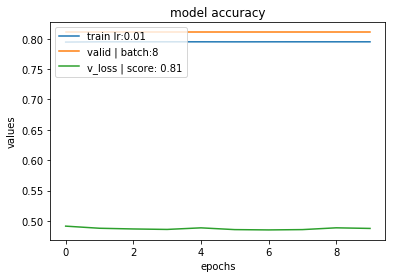

In [185]:
# summarize history for accuracy
score = model.evaluate(x_test, y_test, verbose=0)
# plotting
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.plot(model.history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('values')
plt.xlabel('epochs')
plt.legend(['train lr:{}'.format(ad_lr), 'valid | batch:{}'.format(batch_size), 'v_loss | score: {}'.format(score[1].round(2))], loc='upper left')
plt.show()

In [186]:
# evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Model eval accuracy: ", score[1])

Model eval accuracy:  0.8106763175940842


#### Testing the model on sample (TBD)

In [110]:
#pred = model.predict_classes(x_t)
#proba = model.predict(x_t)